In [31]:
from quantopian.interactive.data.sentdex import sentiment

In [32]:
from quantopian.pipeline.filters.morningstar import Q1500US

In [33]:
type(sentiment)

<class 'blaze.expr.expressions.Field'>

In [34]:
dir(sentiment)

['apply',
 u'asof_date',
 'cast',
 'count',
 'count_values',
 'distinct',
 'drop_field',
 'dshape',
 'fields',
 'head',
 'isidentical',
 'map',
 'ndim',
 'nelements',
 'nrows',
 'nunique',
 'peek',
 'relabel',
 'sample',
 'schema',
 u'sentiment_signal',
 'shape',
 'shift',
 u'sid',
 'sort',
 u'symbol',
 'tail',
 u'timestamp']

In [35]:
BAC = symbols('BAC').sid
bac_sentiment = sentiment[ (sentiment.sid==BAC) ]

In [36]:
bac_sentiment.head()

,symbol,sentiment_signal,sid,asof_date,timestamp
0,BAC,6.0,700,2012-11-14,2012-11-15
1,BAC,1.0,700,2012-11-15,2012-11-16
2,BAC,-1.0,700,2012-11-16,2012-11-17
3,BAC,-1.0,700,2012-11-17,2012-11-18
4,BAC,-1.0,700,2012-11-18,2012-11-19
5,BAC,6.0,700,2012-11-19,2012-11-20
6,BAC,6.0,700,2012-11-20,2012-11-21
7,BAC,6.0,700,2012-11-21,2012-11-22
8,BAC,6.0,700,2012-11-22,2012-11-23
9,BAC,6.0,700,2012-11-23,2012-11-24


In [37]:
bac_sentiment.peek()

,symbol,sentiment_signal,sid,asof_date,timestamp
0,BAC,6.0,700,2012-11-14,2012-11-15
1,BAC,1.0,700,2012-11-15,2012-11-16
2,BAC,-1.0,700,2012-11-16,2012-11-17
3,BAC,-1.0,700,2012-11-17,2012-11-18
4,BAC,-1.0,700,2012-11-18,2012-11-19
5,BAC,6.0,700,2012-11-19,2012-11-20
6,BAC,6.0,700,2012-11-20,2012-11-21
7,BAC,6.0,700,2012-11-21,2012-11-22
8,BAC,6.0,700,2012-11-22,2012-11-23
9,BAC,6.0,700,2012-11-23,2012-11-24


In [38]:
import blaze

In [39]:
bac_sentiment = blaze.compute(bac_sentiment)

In [40]:
type(bac_sentiment)

<class 'pandas.core.frame.DataFrame'>

In [41]:
bac_sentiment.head()

,symbol,sentiment_signal,sid,asof_date,timestamp
0,BAC,6.0,700,2012-11-14,2012-11-15
1,BAC,1.0,700,2012-11-15,2012-11-16
2,BAC,-1.0,700,2012-11-16,2012-11-17
3,BAC,-1.0,700,2012-11-17,2012-11-18
4,BAC,-1.0,700,2012-11-18,2012-11-19


In [42]:
bac_sentiment.set_index('asof_date', inplace=True)

In [43]:
bac_sentiment.head()

,symbol,sentiment_signal,sid,timestamp
asof_date,,,,
2012-11-14,BAC,6.0,700,2012-11-15
2012-11-15,BAC,1.0,700,2012-11-16
2012-11-16,BAC,-1.0,700,2012-11-17
2012-11-17,BAC,-1.0,700,2012-11-18
2012-11-18,BAC,-1.0,700,2012-11-19


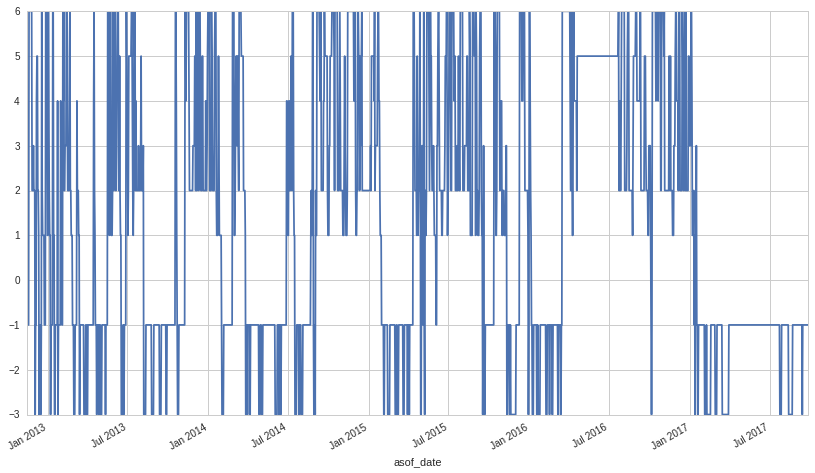

In [44]:
bac_sentiment['sentiment_signal'].plot()

In [45]:
bac_sentiment = bac_sentiment[ (bac_sentiment.index > '2016-06-01') ]

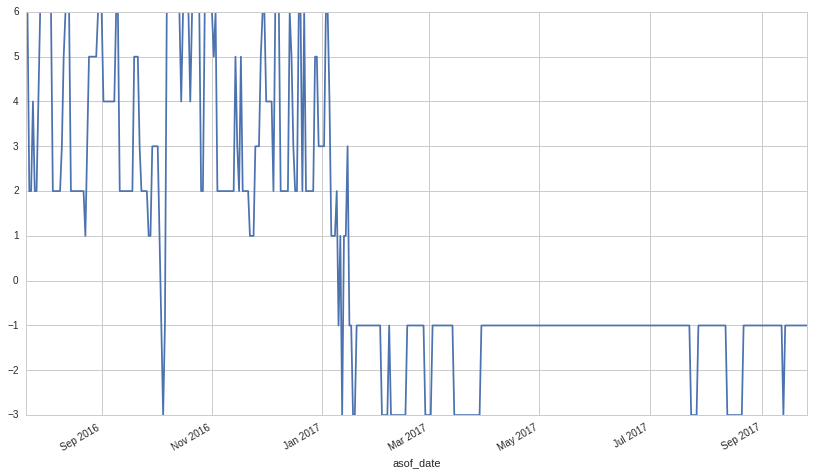

In [46]:
bac_sentiment['sentiment_signal'].plot()

In [47]:
from quantopian.pipeline import Pipeline

In [48]:
def make_pipeline():
    return Pipeline()

In [49]:
from quantopian.research import run_pipeline

In [50]:
result = run_pipeline(make_pipeline(), start_date = '2015-05-05', end_date = '2015-05-05')

In [51]:
type(result)

<class 'pandas.core.frame.DataFrame'>

In [55]:
len(result)
from quantopian.pipeline.data.sentdex import sentiment

In [56]:
def make_pipeline():
    sentiment_factor = sentiment.sentiment_signal.latest
    
    universe = (Q1500US() & sentiment_factor.notnull())
    
    pipe = Pipeline(columns={'sentiment': sentiment_factor,
                            'longs': (sentiment_factor >= 4), 
                            'shorts': (sentiment_factor <= -2)},
                   screen = universe)
    
    return pipe

In [57]:
result = run_pipeline(make_pipeline(), start_date = '2015-01-01', end_date = '2016-01-01')

In [58]:
result.head()

longs  sentiment shorts
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])   False        2.0  False
                          Equity(24 [AAPL])  False        2.0  False
                          Equity(62 [ABT])   False        1.0  False
                          Equity(67 [ADSK])   True        6.0  False
                          Equity(76 [TAP])   False       -3.0   True

In [60]:
assets = result.index.levels[1].unique()
len(assets)

523

In [61]:
pricing = get_pricing(assets, start_date = '2014-12-01', end_date = '2016-02-01', fields = 'open_price')

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-3.0,1.0,-1.519355,0.944884,79410,61.969831
2,1.0,6.0,3.253565,1.919199,48733,38.030169


Returns Analysis


,1,5,10
Ann. alpha,0.016,0.025,0.022
beta,-0.006,-0.030,-0.042
Mean Period Wise Return Top Quantile (bps),0.663,4.671,9.293
Mean Period Wise Return Bottom Quantile (bps),-0.407,-2.867,-5.703
Mean Period Wise Spread (bps),1.133,1.593,1.612


Information Analysis


,1,5,10
IC Mean,0.005,0.015,0.020
IC Std.,0.060,0.061,0.059
t-stat(IC),1.427,3.784,5.526
p-value(IC),0.155,0.000,0.000
IC Skew,-0.043,-0.131,-0.018
IC Kurtosis,0.208,-0.300,-0.530
Ann. IR,1.424,3.776,5.515


Turnover Analysis


,1,5,10
Quantile 1 Mean Turnover,0.031,0.081,0.117
Quantile 2 Mean Turnover,0.050,0.132,0.188


,1,5,10
Mean Factor Rank Autocorrelation,0.894,0.725,0.615


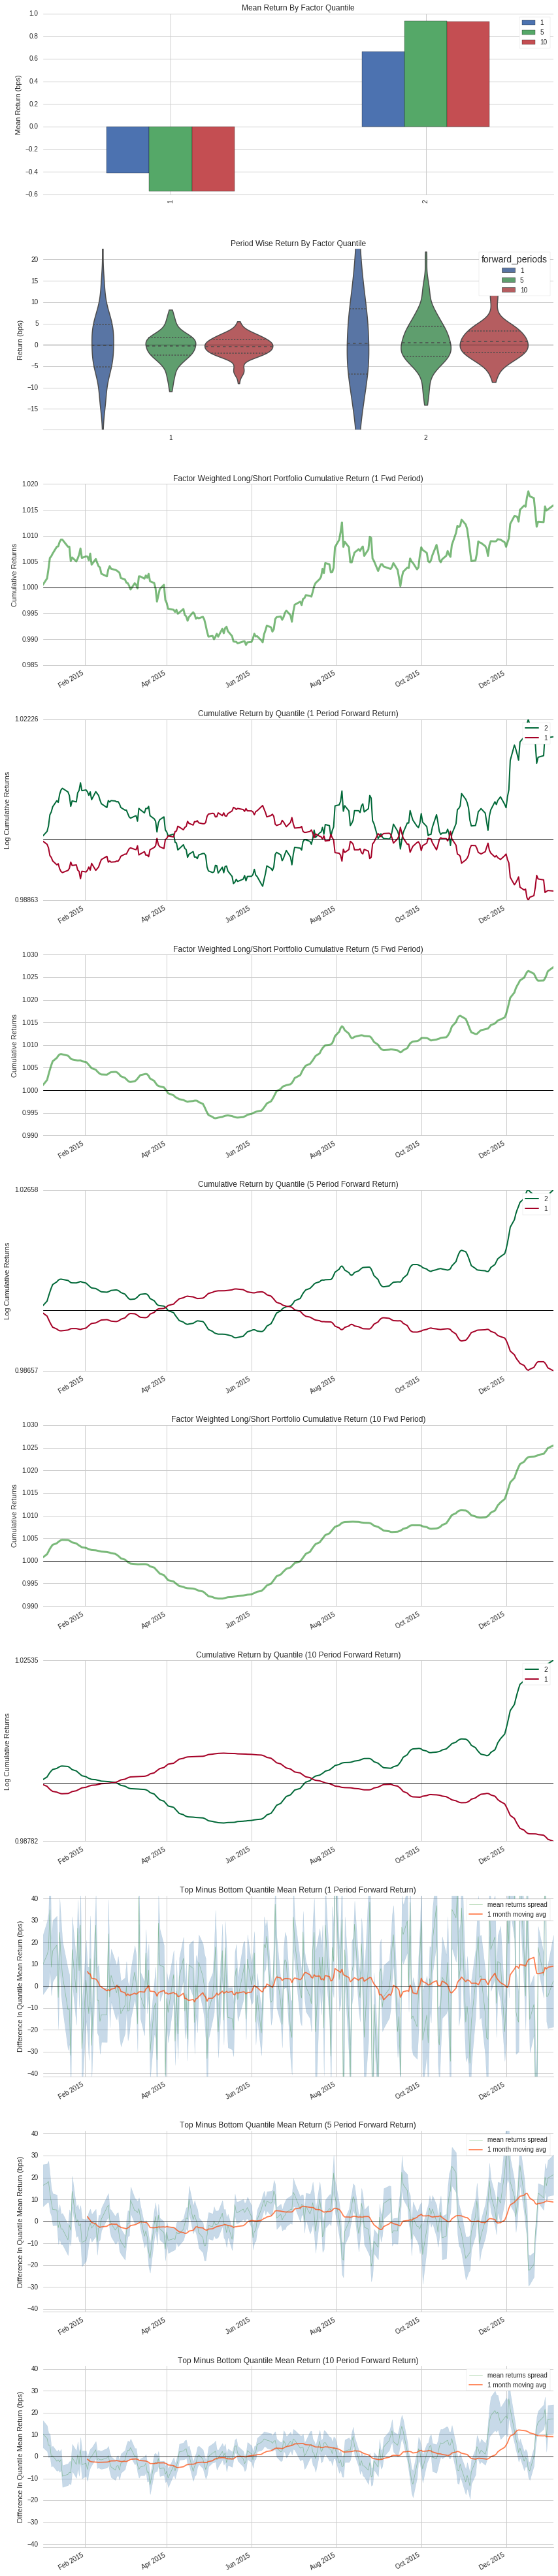

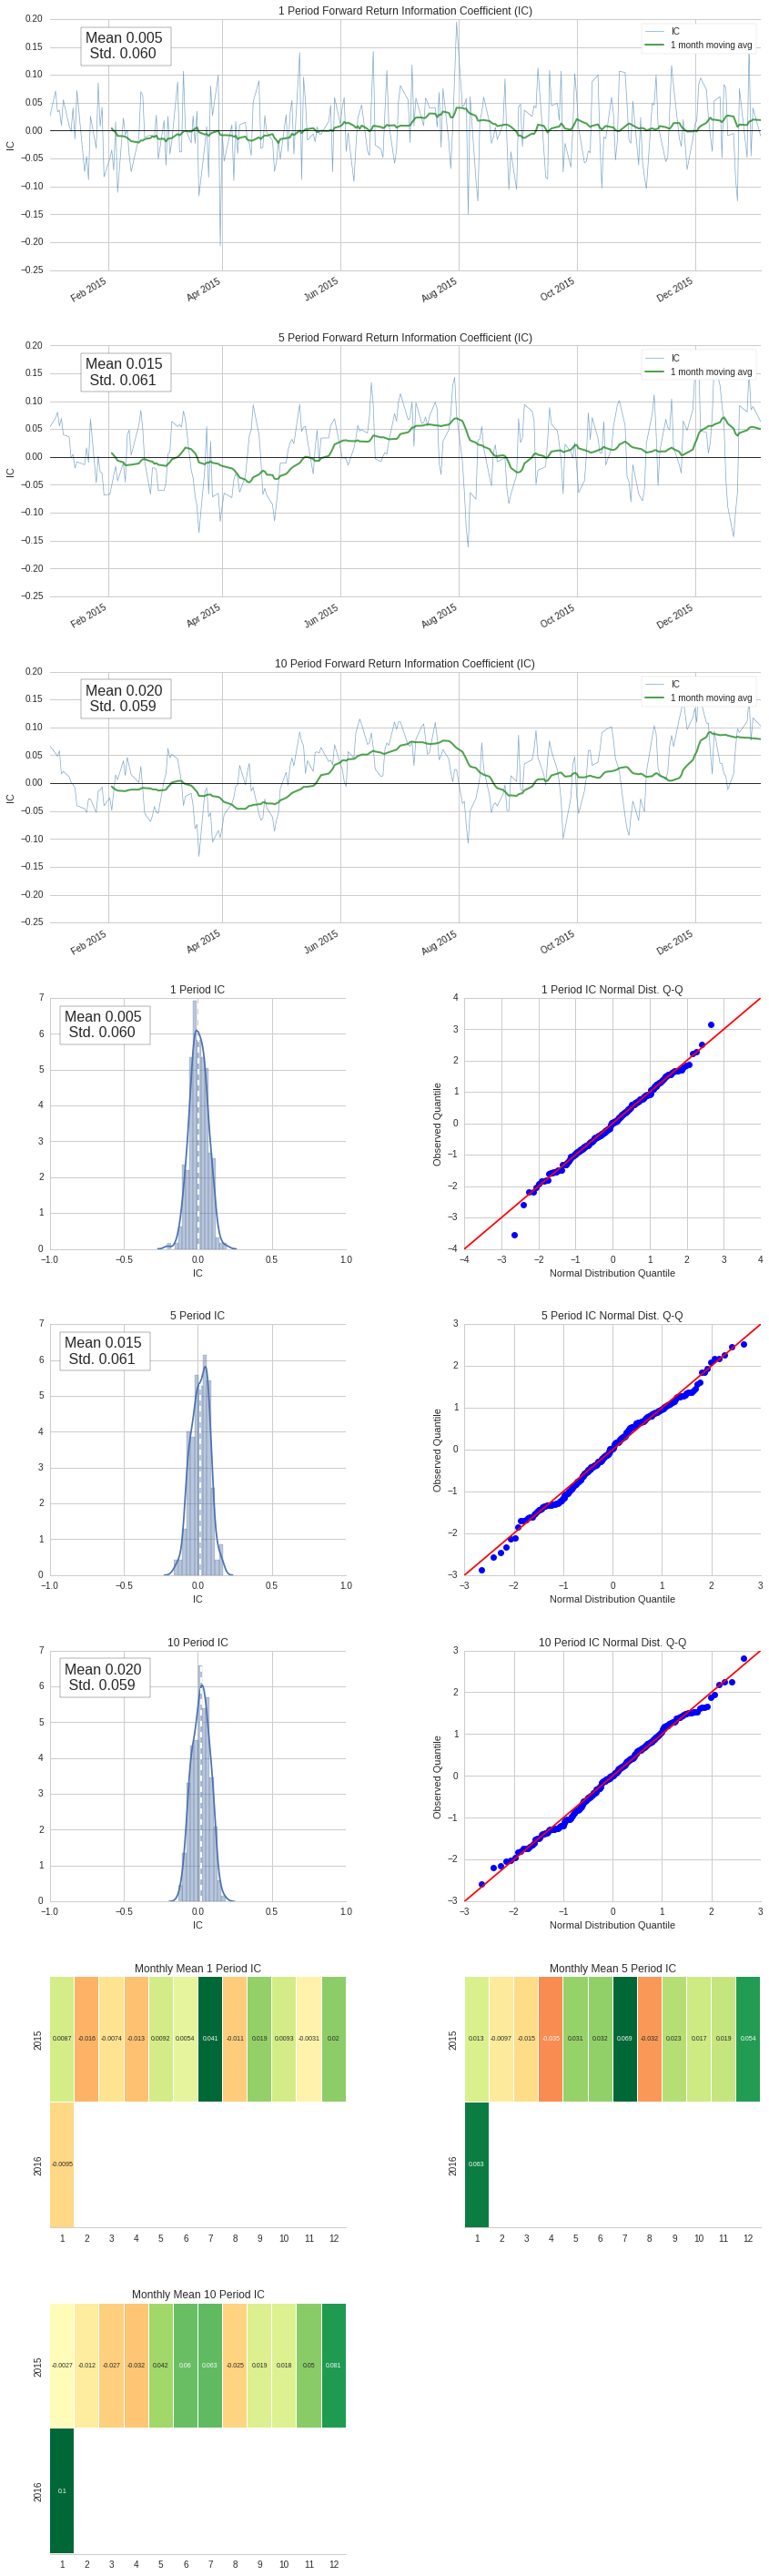

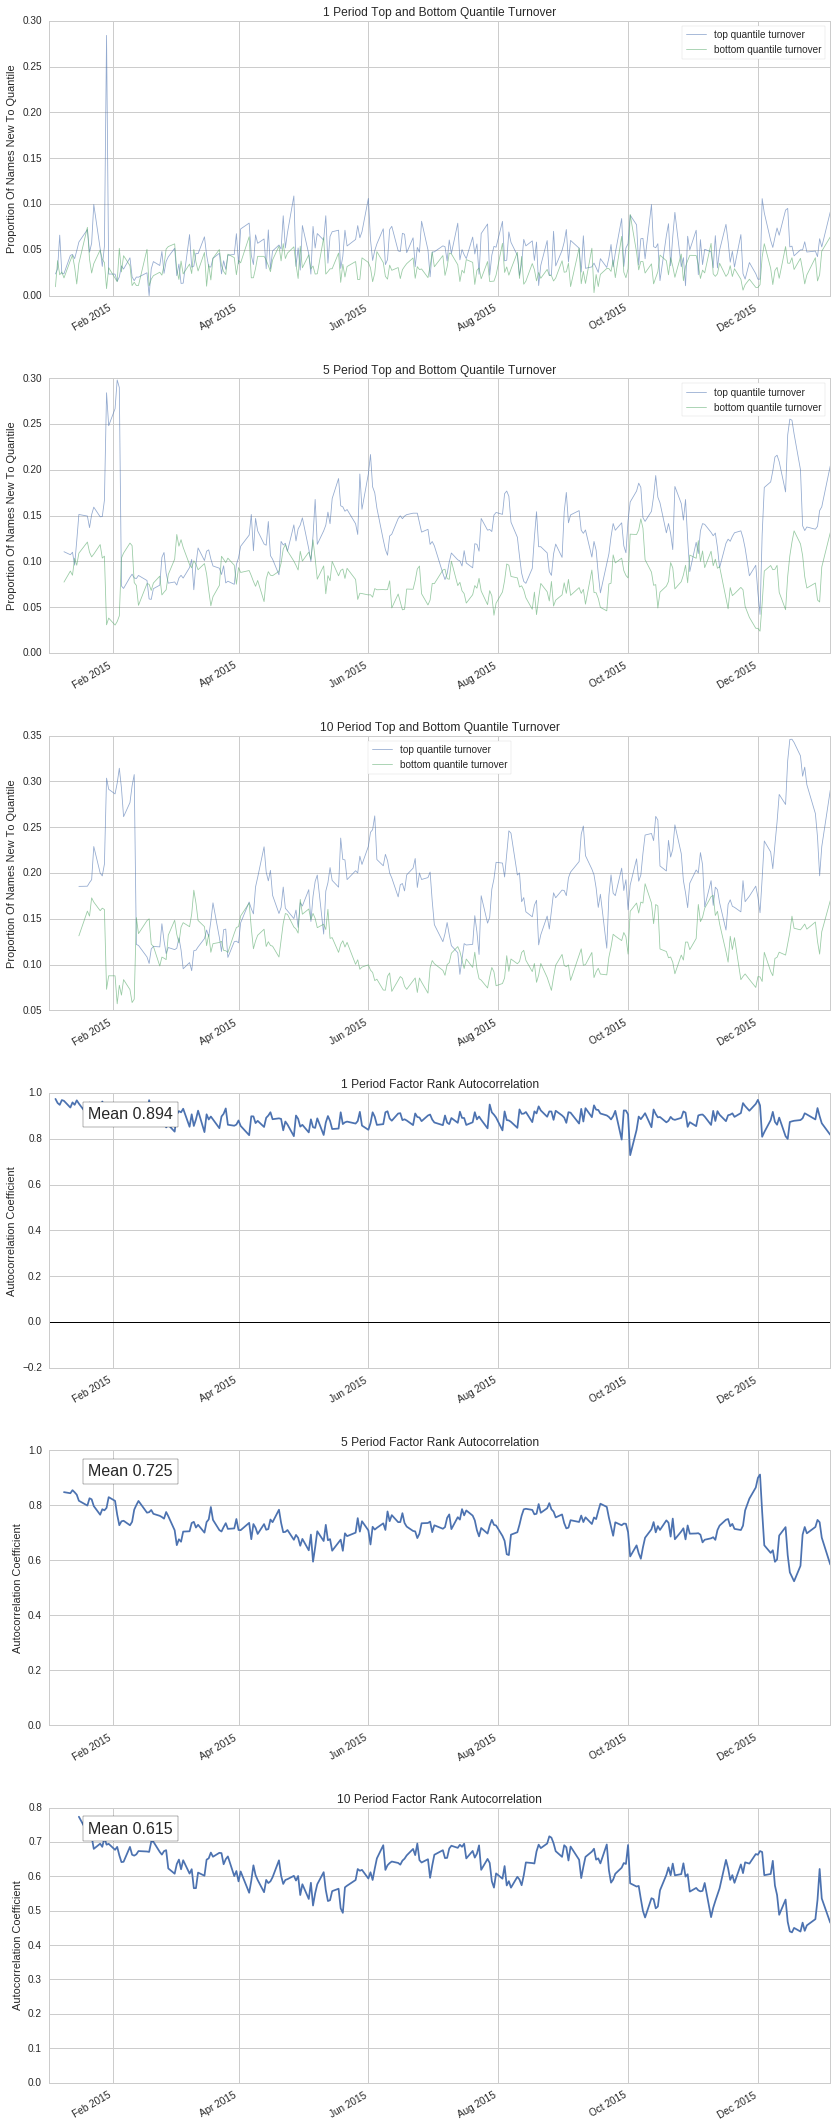

In [63]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['sentiment'],
                                                                   prices = pricing,
                                                                   quantiles = 2,
                                                                   periods = (1,5,10))

alphalens.tears.create_full_tear_sheet(factor_data)

In [65]:
bt = get_backtest('59f148db89911b3fe1e85119')

100% Time: 0:00:05|###########################################################|


Start date,2015-01-06
End date,2015-12-31
Total months,11
,Backtest
Annual return,-3.9%
Cumulative returns,-3.8%
Annual volatility,2.8%
Sharpe ratio,-1.41
Calmar ratio,-0.80
Stability,0.58
Max drawdown,-4.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.83,2015-01-15,2015-10-14,NaT,NaN
1,0.23,2015-01-07,2015-01-09,2015-01-13,5
2,0.00,2015-01-06,2015-01-06,2015-01-06,1
3,0.00,2015-01-06,2015-01-06,2015-01-06,1
4,0.00,2015-01-06,2015-01-06,2015-01-06,1


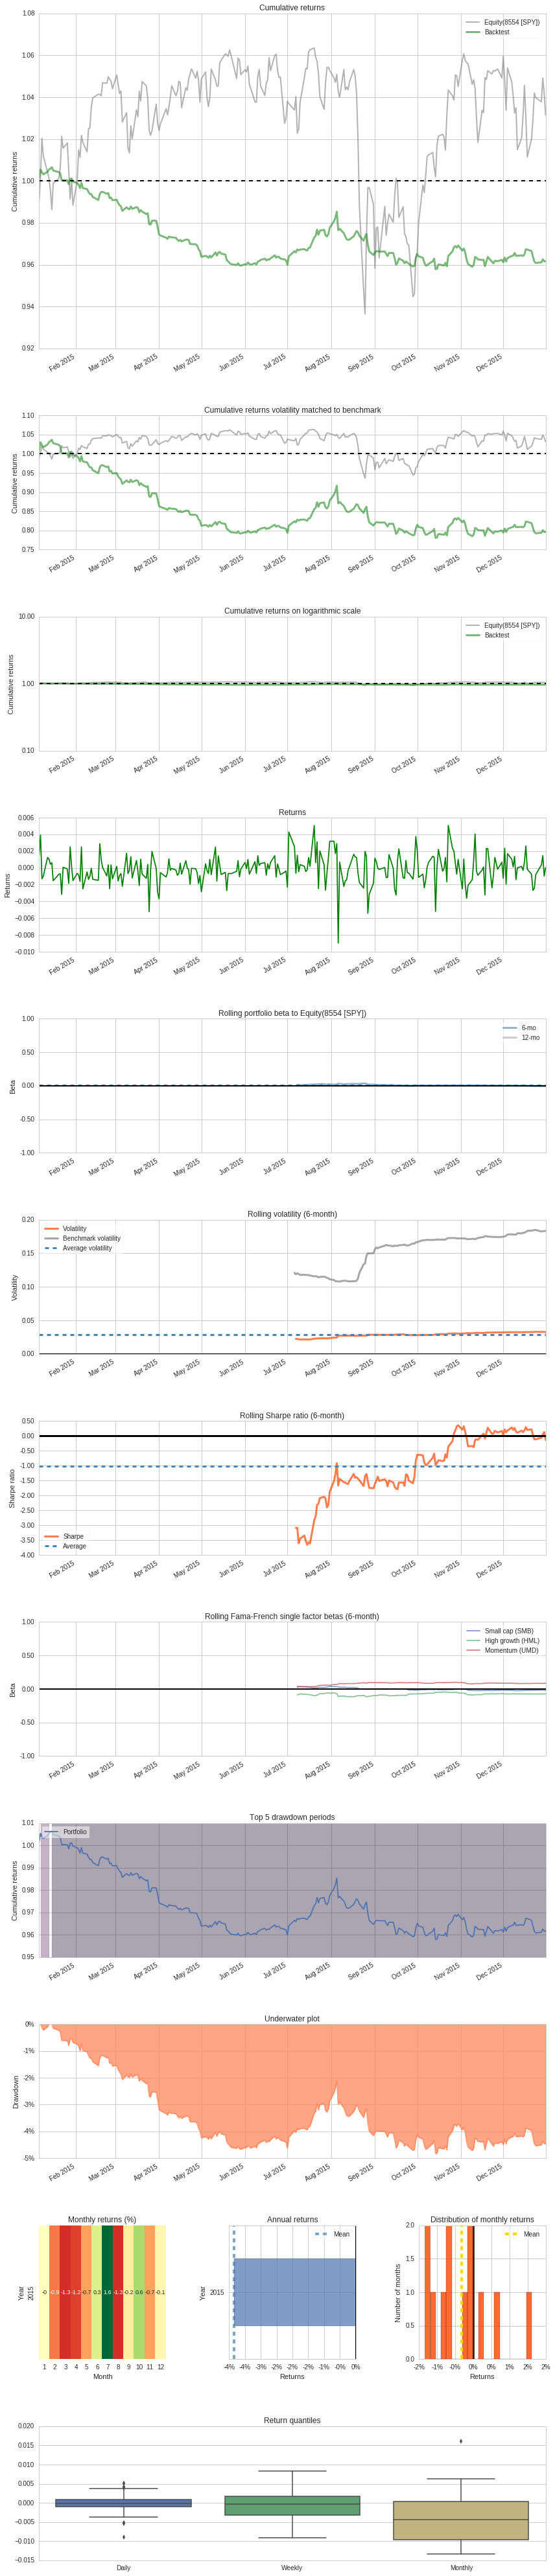

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
Fall2015,-0.03%,-0.54%,0.37%
New Normal,-0.02%,-0.90%,0.51%


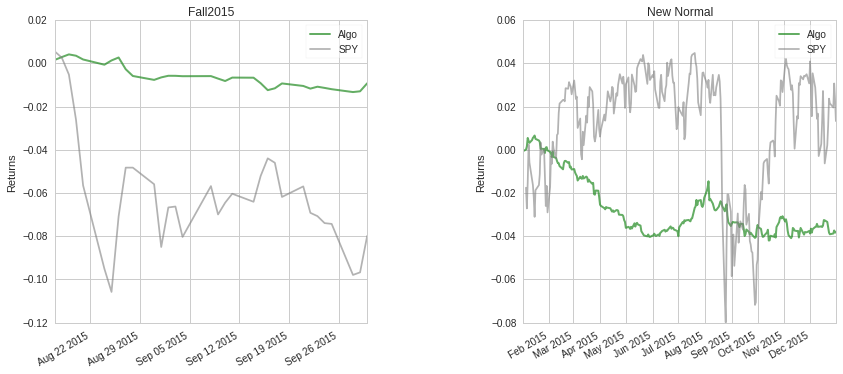

Top 10 long positions of all time,max
CTXS-14014,1.01%
JBL-8831,1.01%
TXT-7674,1.00%
AEE-24783,1.00%
DISC_A-36930,1.00%
PBI-5773,1.00%
IR-4010,1.00%
ADBE-114,1.00%
MGM-4831,1.00%
EXC-22114,1.00%


Top 10 short positions of all time,max
AVP-660,-1.01%
DHI-2298,-1.01%
PHM-5969,-1.00%
ATVI-9883,-0.99%
DG-38936,-0.99%
ALXN-14328,-0.99%
PVTB-20273,-0.98%
XRX-8354,-0.98%
WEB-27762,-0.98%
JWN-5382,-0.98%


Top 10 positions of all time,max
AVP-660,1.01%
CTXS-14014,1.01%
DHI-2298,1.01%
JBL-8831,1.01%
TXT-7674,1.00%
PHM-5969,1.00%
AEE-24783,1.00%
DISC_A-36930,1.00%
PBI-5773,1.00%
IR-4010,1.00%


All positions ever held,max
AVP-660,1.01%
CTXS-14014,1.01%
DHI-2298,1.01%
JBL-8831,1.01%
TXT-7674,1.00%
PHM-5969,1.00%
AEE-24783,1.00%
DISC_A-36930,1.00%
PBI-5773,1.00%
IR-4010,1.00%


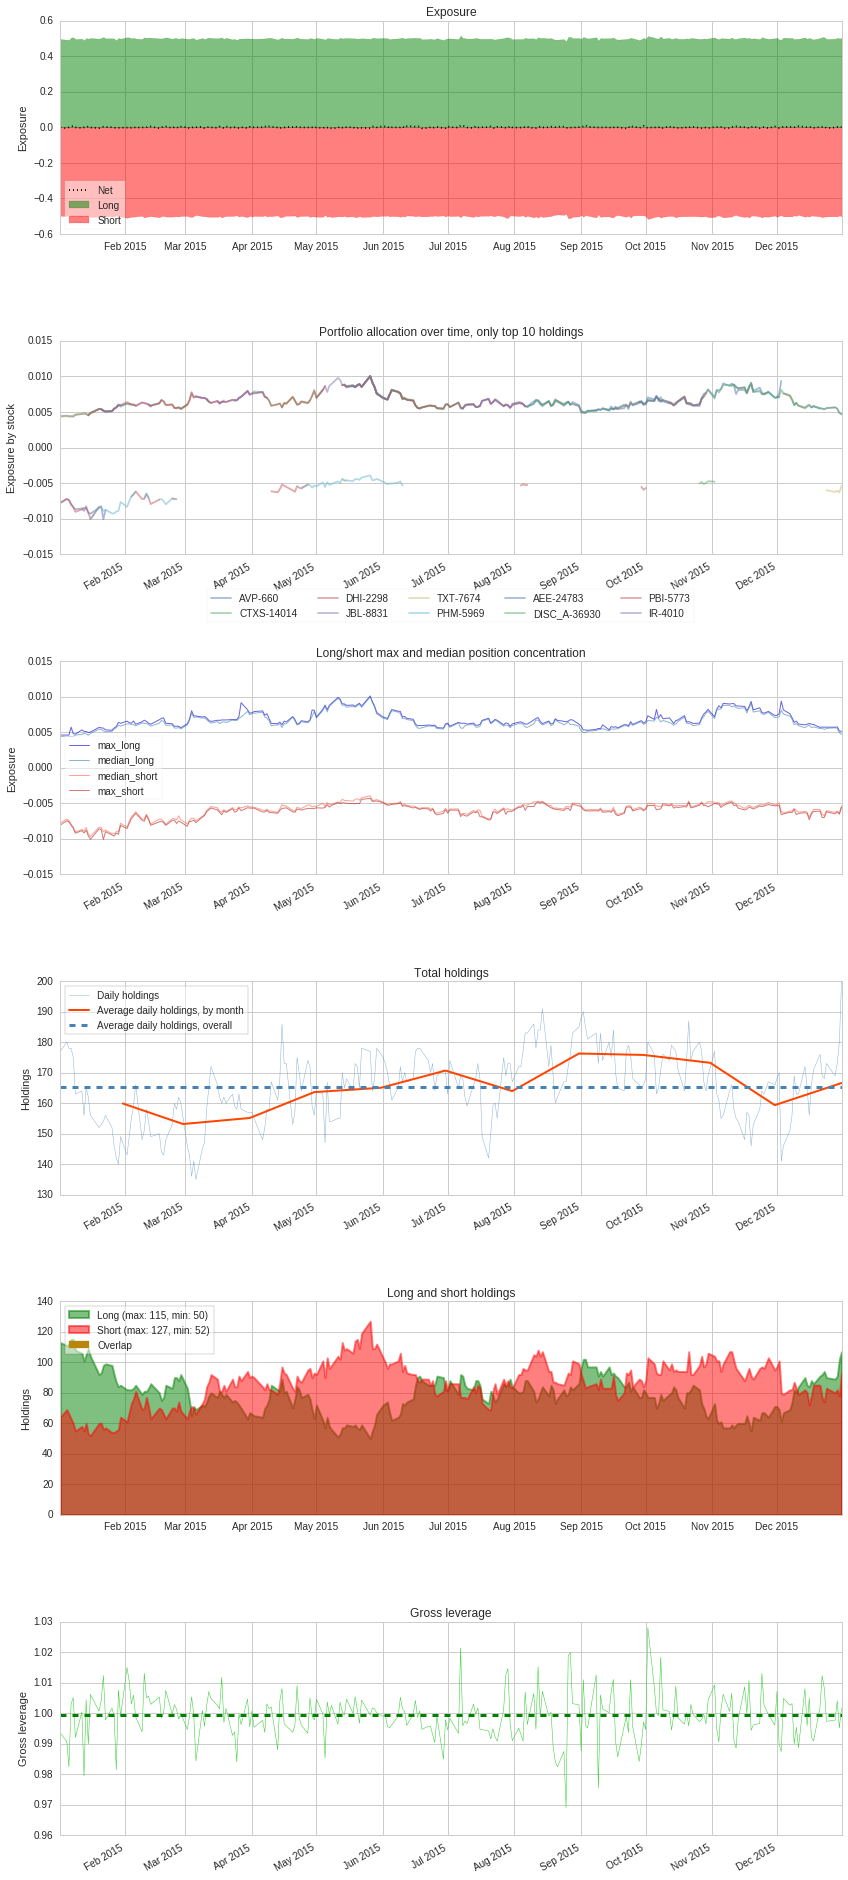

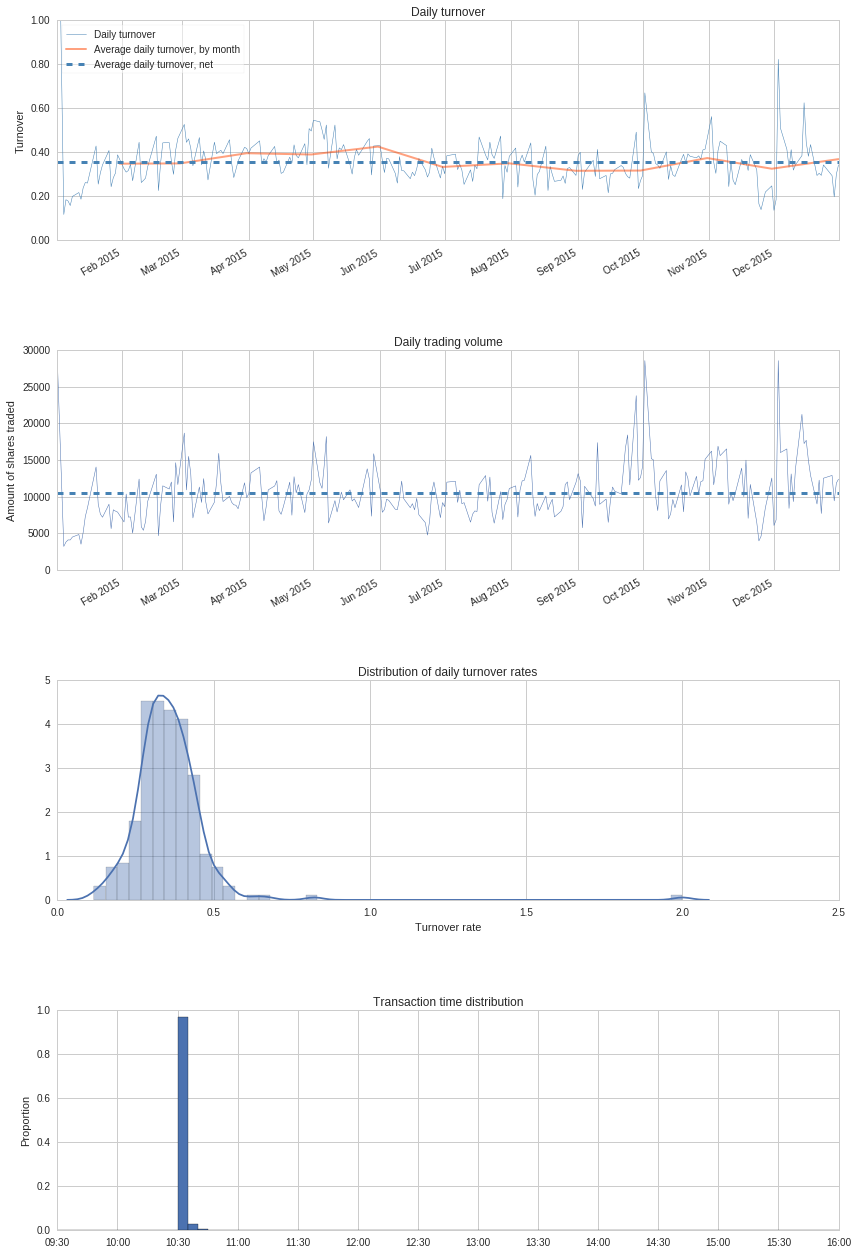

In [66]:
bt.create_full_tear_sheet()